In [10]:
%matplotlib inline

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import tree
from sklearn.model_selection import GridSearchCV


import SweetSpotPrediction as ssp

# 04 Classification Model
one of the better models from step 03 can here be tuned
*Note: Run 01 to build the .csv files needed*

In [11]:
df = pd.read_csv('ClassificationData.csv')

In [12]:
features = [
    #'XPos', # propbably dont want these as features
    #'YPos', # propbably dont want these as features
    'Thickness',
    'AvgNTG',
    'AvgPerm',
    'AvgPoro',
    'NetPerm',

]

label_cls = 'SweetSpot' 

In [13]:
df.dropna(inplace=True)

In [14]:
X_train, X_, y_train, y_ = train_test_split(df[features], df[label_cls], test_size=0.33, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_, y_, test_size=0.50, random_state=42)

In [15]:
preprocessing = StandardScaler()
X_train = preprocessing.fit_transform(X_train)
X_test = preprocessing.transform(X_test)
X_val = preprocessing.transform(X_val)
X_train[:5]

array([[ 1.65014232,  0.18231105, -0.16373121,  0.7286982 ,  0.3948424 ],
       [ 1.04073621, -0.32438038, -0.1754074 ,  0.31141331,  2.7195599 ],
       [-0.22082252, -0.02677682, -0.37602856, -0.93338002, -0.05879958],
       [ 0.04493207, -1.23242817,  1.86304624,  0.09908652, -0.96789496],
       [ 0.4751954 , -0.98980224,  0.27746817,  0.04990199,  0.9685945 ]])

In [16]:
from sklearn.ensemble import AdaBoostClassifier

DTC = tree.DecisionTreeClassifier(random_state = 11, max_features = "auto", class_weight = "balanced",max_depth = None)
clf = AdaBoostClassifier(base_estimator = DTC)

In [17]:
clf.fit(X_train, y_train)
y_pred_val = clf.predict(X_val)
ssp.ReportMetrics(clf, X_train, X_val, y_train, y_val, y_pred_val)

Precision: 0.851
Recall: 0.810
F1: 0.830


# Lets optimize hyper parameters

In [18]:
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2 , 4, 8 ,16, 32,64,128,256]
             }


# run grid search
grid_search_clf = GridSearchCV(clf, param_grid=param_grid, scoring = 'roc_auc', cv=5,iid=False)
grid_search_clf.fit(X_train, y_train)
grid_search_clf.best_params_
clf = grid_search_clf.best_estimator_


In [19]:
y_pred_val = clf.predict(X_val)
ssp.ReportMetrics(clf, X_train, X_val, y_train, y_val, y_pred_val)

Precision: 0.798
Recall: 0.802
F1: 0.800


# Original

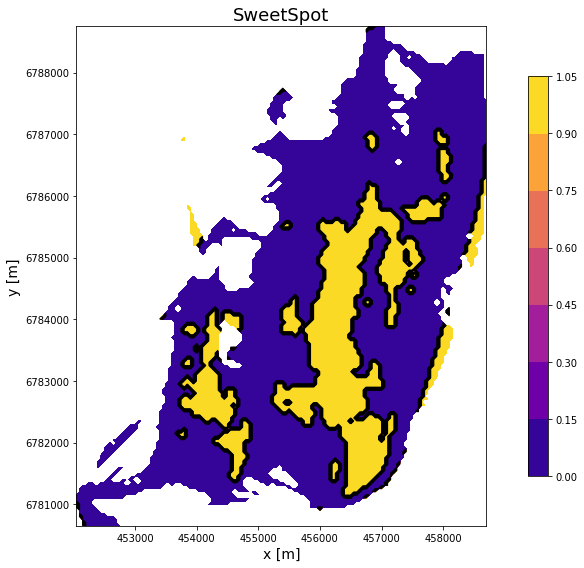

In [20]:
ssp.plot_map(df, label_cls)

# Prediction

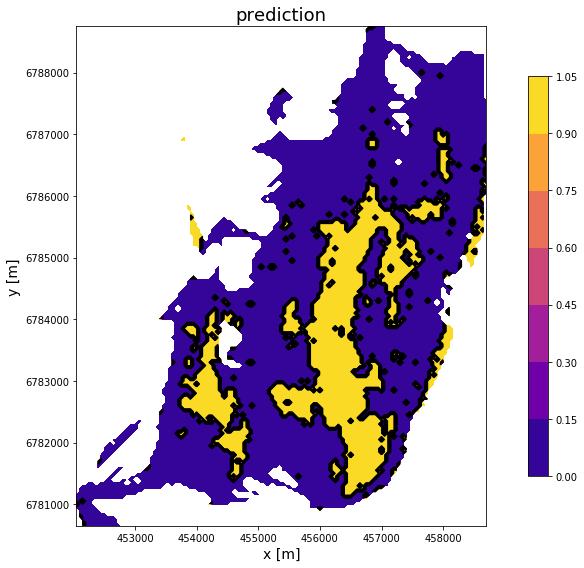

In [21]:
df['prediction'] = clf.predict(preprocessing.transform(df[features]))
ssp.plot_map(df, 'prediction')

# lets draw how certain the clasifications are

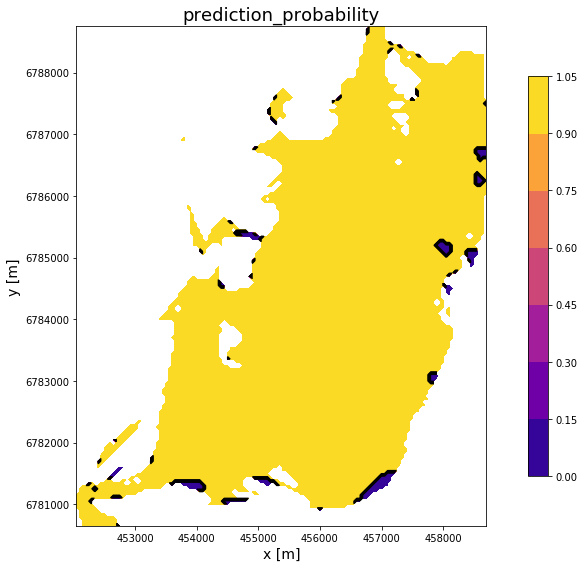

In [22]:
df['prediction_probability'] = clf.predict_proba(df[features])[:,1] # with 1 beeing the probability that there is a sweetspot
ssp.plot_map(df, 'prediction_probability')

# <a href="03 Exploration of models.ipynb">Previous</a> Notebook